# Исследование перспективных для продажи игр


Интернет-магазин «Стримчик»,  продаёт  компьютерные игры. Имеются данные о продажах игр зам 2016г, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. 


**Описание данных:**

* __``Name``__ — *название игры*
* __``Platform``__ — *платформа*
* __``Year_of_Release``__ — *год выпуска*
* __``Genre``__ — *жанр игры*
* __``NA_sales``__ — *продажи в Северной Америке (миллионы проданных копий)*
* __``EU_sales``__ — *продажи в Европе (миллионы проданных копий)*
* __``JP_sales``__ — *продажи в Японии (миллионы проданных копий)*
* __``Other_sales``__ — *продажи в других странах (миллионы проданных копий)*
* __``Critic_Score ``__ — *оценка критиков (максимум 100)*
* __``User_Score``__ — *оценка пользователей (максимум 10)*
* __``Rating``__ — *рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию*



1. [Открытие исходных данных](#start)
   * [Вывод](#resume1)


2. [Предобработка данных](#preprocessing)
   * [Переименование столбцов](#rename)
   * [Изменение типов даных](#types)
   * [Заполнение пропусков](#null)
   * [Добавление данных](#addition)
   
   * [Удаление дубликатов](#dublicated)
    

3. [Изучение продад по платформам](#analisys)
   * [Распределение числа игр по годам](#year)
   * [Распределение продаж по платформам](#platforms)
   * [Влияние оценок на продажи PS4](#platform_PS4)
   * [Влияние оценок на продажи XOne](#platform_XOne)  
   * [Распределение игр по жанрам](#genre)  
 
 
4. [Изучение продаж по регионам](#region) 
   * [Влияние региона на продажи](#top_region)
   * [Влияние жанра на продажи](#top_genre)
   * [Влияние рейтинга](#raiting) 
   
   
5. [Формулирование и проверка гипотез](#hypothesis)
   * [Изучение рейтингов платформ Xbox One и PC](#xbox)
   * [Изучение рейтингов жанров Action и Sports](#action)
   
   
6. [Вывод](#resume)


## 1. Открытие исходных данных
<a id="#start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
#import pandas_profiling
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('d:/Home/datasets/games.csv')
except:
    data = pd.read_csv("/datasets/games.csv")

In [3]:
#pandas_profiling.ProfileReport(data, minimal=True)
#profile = ProfileReport(data, minimal=True)
#profile.to_file("Games data profiling.html")

In [4]:
data[:2]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Преобразовать год к целому. заполнить проауски либо удалить рейтинг и результаты

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Оценили масштаб таблицы и увидели какие имеются признаки. Необходимо преобразование типов в int и float. Посмотрим имеются ли пропуски и где.

In [7]:
data.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Пропуски есть, в последних столбцах около 50%. Посмотрим корректные ли данные в столбцах.

In [8]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Не все игры продаются во всех странах.

In [9]:
data['Year_of_Release'].sort_values().unique()
#print(data['rooms'].value_counts().sum())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [10]:
data['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [11]:
data['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [12]:
 data['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)


Требуется обработка прзнака Year_of_Release. Год целочисленный тип. Ошибка вырузки

### Вывод
<a id="resume1"></a>



Имеются пропуски в столбцах. Найдено несоотвествие типов даных, параметры по смыслу целочисленные  или вещественные. Пропуски год выпуска удалим, средним не заполнить. Оценку пользоватеоей можно заполнить средним по типу игры или средним рейтингом фирмы ролизводителя

## Предобработка данных
<a id="preprocessing"></a>

### Приведение к нижнему регистру наименований столбцов
<a id="rename"></a>

In [13]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [14]:
[col.lower() for col in data.columns]

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [15]:
data.columns = ['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [16]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Отбросить все те строки, которые имеет значение 'nan'.
<a id="cut_nan"></a>

In [17]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])


In [18]:
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = 'NaN'
data = data.astype({'user_score' : 'float'})
data.groupby('genre')['user_score'].agg(['mean', 'median'])

,mean,median
genre,,
Action,7.058129,7.4
Adventure,7.139597,7.6
Fighting,7.295949,7.6
Misc,6.805828,7.1
Platform,7.305896,7.7
Puzzle,7.138400,7.5
Racing,7.040859,7.4
Role-Playing,7.624423,7.8
Shooter,7.053260,7.4


Значения tbd заменили на NaN потом медианой. Пропуски user_score и critic_score заменили медианой по жанру. Привели к типу float

### Преобразование типов
<a id="types"></a>

In [19]:
data = data.astype({'year_of_release' : 'int'})
#data = data.astype({'user_score' : 'float', 'critic_score':'float'})
data[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


По смыслу целочисленный тип. Ошибка выгрузки

### Заполнение пропусков
<a id="null"></a>

In [20]:
data['critic_score'] = data.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.median()))
data['user_score'] = data.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.median()))
data[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,NaN


ЗАменили медианой признака оценка критиков и оценка пользователей по группе жанр игры

In [21]:
data['rating'] = data['rating'].fillna('no_info')
data[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,no_info


Рейтинг заменить нечем, заменим no_info, ошибка заполнения

In [22]:
data.isnull().mean()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Все пропуски заполнены

In [23]:
data.duplicated().sum()

0

Дубликатов нет

### Добаволение значений
<a id="addition"></a>

суммарные продажи во всех регионах

In [24]:
data[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,no_info


Кто любит играть больше всего?

In [25]:
eu_sales = data['eu_sales'].sum()
na_sales = data['na_sales'].sum()
jp_sales  = data['jp_sales'].sum()
other_sales = data['other_sales'].sum()

sales_region = {'sales_region':['eu_sales', 'na_sales', 'jp_sales', 'other_sales'],
       'value':[eu_sales, na_sales, jp_sales, other_sales]}
sales_region = pd.DataFrame(sales_region)
sales_region

,sales_region,value
0,eu_sales,2399.68
1,na_sales,4341.42
2,jp_sales,1290.64
3,other_sales,782.63


Больше всего играть любят в Северной Америке

## 3. Анализ данных
<a id="analisys"></a>

Обще число продаж по регионам

In [26]:
data['platform_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

####  3.1 Распределения  игр  по годам
<a id="year"></a>

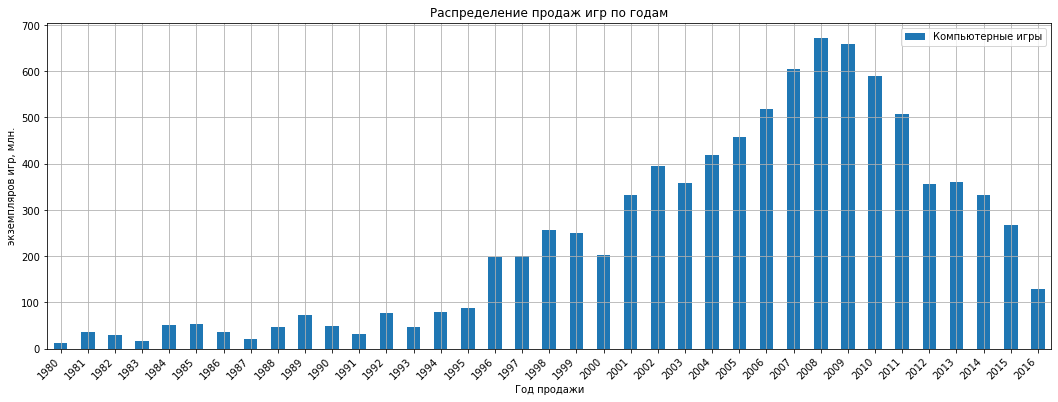

In [27]:
ax = (data
      .groupby('year_of_release')['platform_sales']
      .agg(['sum'])
      .plot.bar(figsize=(18,6), grid=True)
     )

ax.legend(["Компьютерные игры"]);
ax.set_title('Распределение продаж игр по годам');
ax.set_xlabel('Год продажи');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
#ax.set_xticklabels(data.year_of_release);

до  1994  можно отбросить, посмотрим сразу по регионам

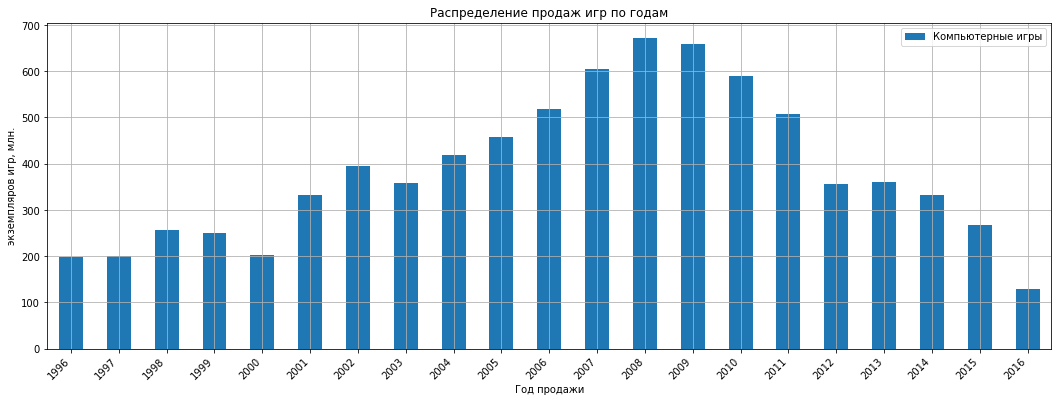

In [28]:
ax = (data.query('year_of_release > 1995')
      .groupby('year_of_release')['platform_sales']
      .agg(['sum'])
      .plot.bar(figsize=(18,6), grid=True)
     )

ax.legend(["Компьютерные игры"]);
ax.set_title('Распределение продаж игр по годам');
ax.set_xlabel('Год продажи');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


По числу покупок лидирует  Америка. Плавный рост с 1996. Пик покупок приходитмся на 2008. Потом постепенное снижение. С 2011 намечается рост покупок игр в Европе по отношению к Америке.

Распределение продаж платформ по годам  нормальное.Период развития игровых плятформ до уровня 200 млн состоавляет 4 года, период упадка с 200 млн до нуля таже 4 года, 9 лет доминирования, расцвета и постепенного затухания успеха. 

### 3.2 Продажи по платформам
<a id="platforms"></a>

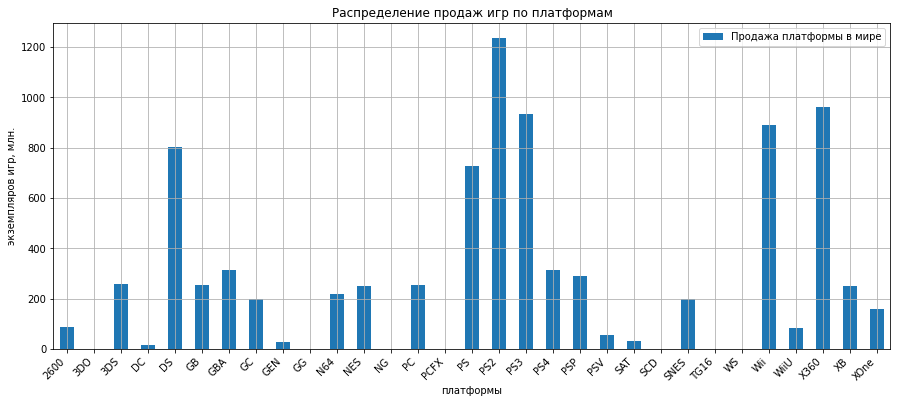

In [29]:
ax = (data
      .groupby('platform')['platform_sales']
      .agg(['sum'])
      .plot.bar(figsize=(15,6), grid=True)
     )

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

ax.legend(["Продажа платформы в мире"]);
ax.set_title('Распределение продаж игр по платформам');
ax.set_xlabel('платформы');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

###### PS2, PS3, X360, Wii, DS  самые продаваемые платформы   в прошлом, а в будущем?

In [30]:
top_list = ["DS", "PS2", "PS3", "Wii", "X360"]
top_platform = data.query('platform in @top_list').reset_index(drop=True)
top_platform[:2]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


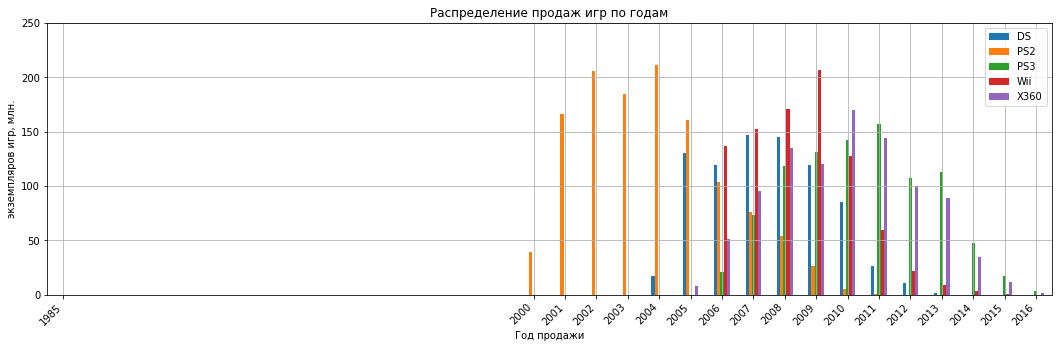

In [31]:

ax = (top_platform
     .pivot_table(index='year_of_release', columns=['platform'],aggfunc={'platform_sales':sum})
     .plot(kind='bar', y='platform_sales', figsize=(18, 5), \
           grid=True,  ylim=(0, 250), xlim=(1995,2020), \
           linewidth=2)
          ) 

#positions = [p for p in top_platform['year_of_release']]
#ax.set_xticks(positions);
#xticks=([p for p in range(1995,2020)])
ax.legend(["DS", "PS2", "PS3", "Wii", "X360"]);
ax.set_title('Распределение продаж игр по годам');
ax.set_xlabel('Год продажи');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Развитие платформы идет в среднем 2 года, пик  около 5 лет, потом идет пологий спад продаж в течение 3-5 лет. Выделяется Wii, продажи сразу стрельнули.

## Потенциальные платформы
<a id="potencial"></a>

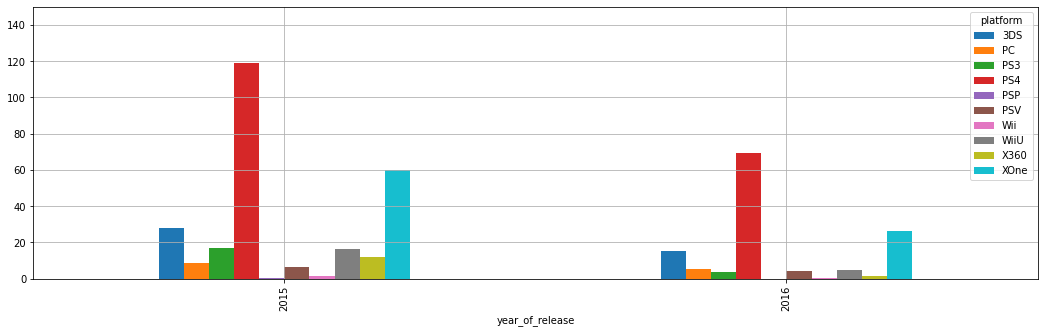

In [32]:
top_platform_new = data.query('year_of_release > 2014').reset_index(drop=True)


ax =  (top_platform_new
           .pivot_table(index='year_of_release', columns=['platform'],aggfunc={'platform_sales':sum})
           .plot(kind='bar',
                 y='platform_sales',
                 figsize=(18, 5),
           grid=True,  ylim=(0, 150), xlim=(2013,2018), \
           linewidth=2))
          

Продажи падают по всем платформам. Есть лидеры продаж на падающем рынке -  PS4, XOne

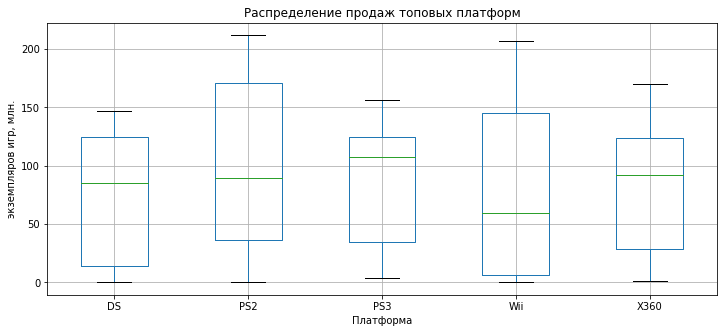

In [33]:
ax = (top_platform.sort_values(by='platform_sales')
     .pivot_table(index='year_of_release', columns='platform',aggfunc={'platform_sales':sum})
     .plot.box( y='platform_sales', figsize=(12, 5), grid=True)
) ;
#ax.legend(["DS", "PS2", "PS3", "Wii", "X360"]);
ax.set_title('Распределение продаж топовых платформ');
ax.set_xlabel('Платформа');
ax.set_ylabel('экземпляров игр, млн.');


* Топовые платформы кроме Wii имеют медиану близкую к 100 млн экз, 25 %  игр платформ PS2, PS3, X360 около 40 млн экз. платформа Wii  около 60 млн экз. 
* Разброс количества прожаж DS, PS3 самый маленький и медиана близка к 3 квартилю, у Wii наблюдается самый большой разброс. 
* PS2 и Wii имеют примерно одинаковые максимумы,  в целом продавались лучше конекурентов 
* 1 квартиль у Wii занижен, что говорит о точ, что спад или подъем были более пологие 

In [34]:
scatt = top_platform_new[['platform_sales','critic_score','user_score', 'platform']]
#top_list = ["DS", "PS2", "PS3", "Wii", "X360"]

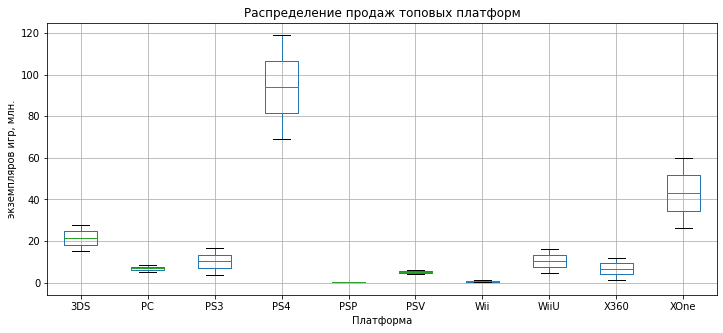

In [35]:
ax = (top_platform_new.sort_values(by='platform_sales')
     .pivot_table(index='year_of_release', columns='platform',aggfunc={'platform_sales':sum})
     .plot.box( y='platform_sales', figsize=(12, 5), grid=True)
) ;
#ax.legend(["DS", "PS2", "PS3", "Wii", "X360"]);
ax.set_title('Распределение продаж топовых платформ');
ax.set_xlabel('Платформа');
ax.set_ylabel('экземпляров игр, млн.');

ТОП за актуальный период с 2014 явно выделяется PS4, XOne. Старт продаж этих платформ превысил продажи от уже уходящих платформ

### 3.3 Влияние отзывов на продажи PS4
<a id="platform_PS4"></a>

In [36]:
scatt_new = top_platform_new[['platform_sales','critic_score','user_score', 'platform']]

In [37]:
platform_name = "PS4"

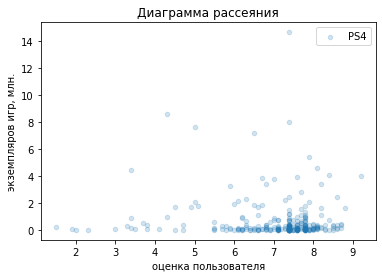

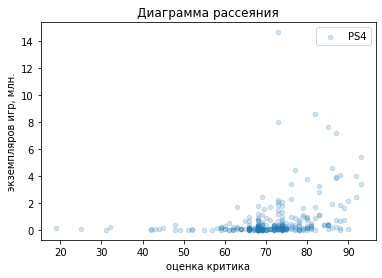

In [38]:
sc = scatt_new[scatt_new['platform']== platform_name]

ax = sc.plot(kind='scatter',x='user_score', y='platform_sales', alpha=0.2, figsize = (6,4));
ax.set_title('Диаграмма рассеяния');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xlabel('оценка пользователя');
ax.legend([platform_name]);

ax = sc.plot(kind='scatter',x='critic_score', y='platform_sales', alpha=0.2);
ax.set_xlabel('оценка критика');
ax.set_title('Диаграмма рассеяния');
ax.set_ylabel('экземпляров игр, млн.');
ax.legend([platform_name]);

In [39]:
sc.corr()

,platform_sales,critic_score,user_score
platform_sales,1.000000,0.311918,-0.069226
critic_score,0.311918,1.000000,0.472169
user_score,-0.069226,0.472169,1.000000


In [40]:
np.var(sc.query('platform==@platform_name')['platform_sales'])

2.115979810377369

In [41]:
np.std(sc.query('platform==@platform_name')['platform_sales'])

1.4546407839660516

Влияние рецензий критиков на количество продаж по шкале Чеддока имеет умеернное влияние, а оценка пользователей влияет очень слабо

### 3.4 Влияние отзывов на продажи XOne
<a id="platform_XOne"></a>

In [42]:
platform_name = "XOne"

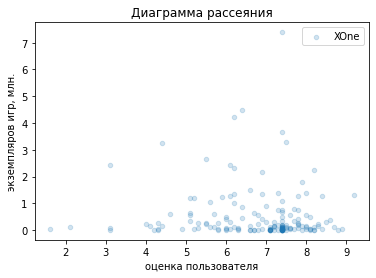

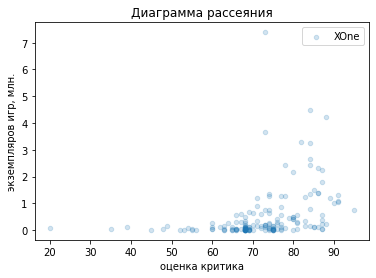

In [43]:
sc = scatt_new[scatt_new['platform']== platform_name]

ax = sc.plot(kind='scatter',x='user_score', y='platform_sales', alpha=0.2, figsize = (6,4));
ax.set_title('Диаграмма рассеяния');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xlabel('оценка пользователя');
ax.legend([platform_name]);

ax = sc.plot(kind='scatter',x='critic_score', y='platform_sales', alpha=0.2);
ax.set_xlabel('оценка критика');
ax.set_title('Диаграмма рассеяния');
ax.set_ylabel('экземпляров игр, млн.');
ax.legend([platform_name]);

In [44]:
sc.corr()

,platform_sales,critic_score,user_score
platform_sales,1.000000,0.358109,-0.055591
critic_score,0.358109,1.000000,0.333465
user_score,-0.055591,0.333465,1.000000


In [45]:
np.var(sc.query('platform==@platform_name')['platform_sales'])

0.9274532252859549

In [46]:
np.std(sc.query('platform==@platform_name')['platform_sales'])

0.9630437296851867

Влияние рецензий критиков на количество продаж по шкале Чеддока имеет умеренное влияние, а оценка пользователей влияет очень слабо

### Вывод 

###### На продажи игр оценки пользователей и критиков влияют слабо 

In [47]:
data['rating'].value_counts()

no_info    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

### 3.4 Распределение игр по жанрам
<a id="genre"></a>

In [48]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Среди жанров явные лидеры экш и спорт

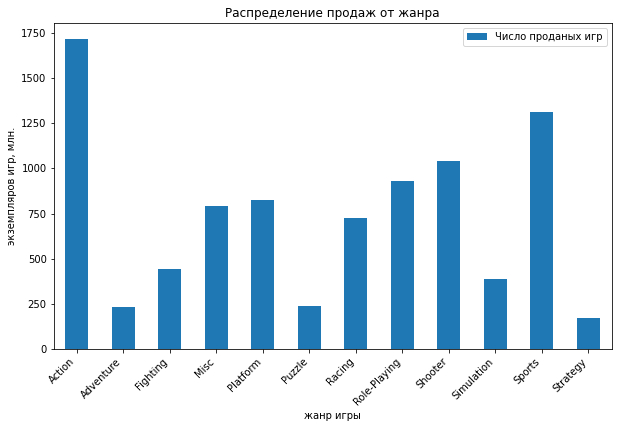

In [49]:
ax = (data
      .groupby('genre')['platform_sales']
      .agg(['sum'])
      .plot(kind='bar', figsize=(10,6))
     )

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title('Распределение продаж от жанра');
ax.set_ylabel('экземпляров игр, млн.');
ax.set_xlabel('жанр игры');
ax.legend(["Число проданых игр"]);

Явные лидеры продаж по жанрам спорт и экшн, аутсайдеры продаж стратегии, пазлы и приключения

# 4 Специфика продаж по регионам
<a id="region"></a>

### 4.1 ТОП-5 платформ по регионам
<a id="top_region"></a>

In [50]:
region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_part = ['na_sales_part', 'eu_sales_part', 'jp_sales_part', 'other_sales_part']

Доля каждой игры в продажах по региону

In [51]:
for j in region:
    data[j+'_part'] = data[j]/data[j].sum()
data[:2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_sales,na_sales_part,eu_sales_part,jp_sales_part,other_sales_part
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.009527,0.012068,0.002921,0.010797
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,no_info,40.24,0.006698,0.001492,0.005276,0.000984


In [52]:
data[region_part].sum()

na_sales_part       1.0
eu_sales_part       1.0
jp_sales_part       1.0
other_sales_part    1.0
dtype: float64

сумма долей = 1

In [53]:
data_new = data[data['year_of_release'] > 2014]
region_sales = data_new.groupby('platform')[region_part].sum()
region_sales.columns = region_part
region_sales[:2]

,na_sales_part,eu_sales_part,jp_sales_part,other_sales_part
platform,,,,
3DS,0.002375,0.003080,0.018247,0.002134
PC,0.000857,0.003792,0.000000,0.001214


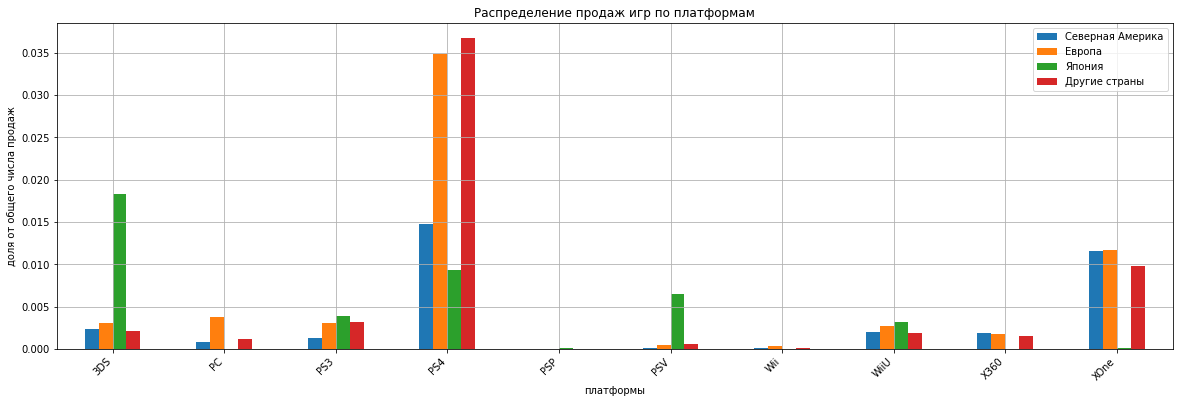

In [54]:
ax = (region_sales[region_part]
      .plot.bar(figsize=(20,6), grid=True)
     )
ax.legend(["Северная Америка", "Европа", "Япония", "Другие страны"]);
ax.set_title('Распределение продаж игр по платформам');
ax.set_xlabel('платформы');
ax.set_ylabel('доля от общего числа продаж');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Общая картина продаж платформ по регионам 

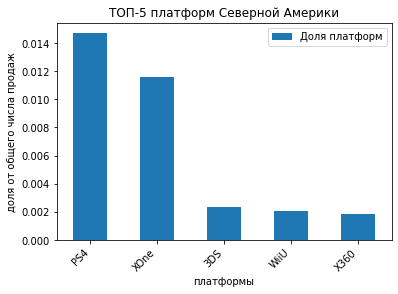

In [55]:
ax = region_sales['na_sales_part'].sort_values(ascending=False).head(5).plot(kind='bar');

ax.set_title('ТОП-5 платформ Северной Америки');
ax.legend(["Доля платформ"]);
ax.set_xlabel('платформы');
ax.set_ylabel('доля от общего числа продаж');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

В Америке предпочитают XOne, PS4

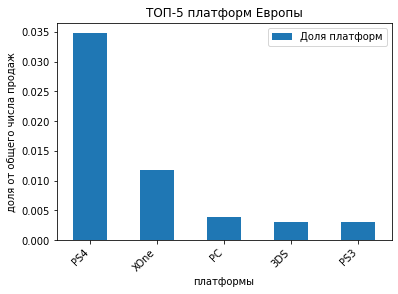

In [56]:
ax = region_sales['eu_sales_part'].sort_values(ascending=False).head(5).plot(kind='bar');

ax.set_title('ТОП-5 платформ Европы');
ax.legend(["Доля платформ"]);
ax.set_xlabel('платформы');
ax.set_ylabel('доля от общего числа продаж');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

В Европе предпочитают PS4

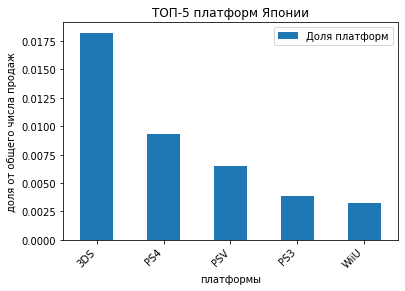

In [57]:
ax = region_sales['jp_sales_part'].sort_values(ascending=False).head(5).plot(kind='bar');

ax.set_title('ТОП-5 платформ Японии');
ax.legend(["Доля платформ"]);
ax.set_xlabel('платформы');
ax.set_ylabel('доля от общего числа продаж');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

В Японии предпочитают 3DS, пристаки типа PS разных версий менее популярны

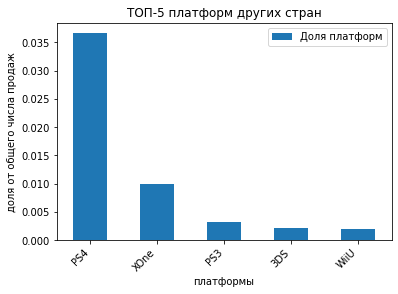

In [58]:
ax = region_sales['other_sales_part'].sort_values(ascending=False).head(5).plot(kind='bar');

ax.set_title('ТОП-5 платформ других стран');
ax.legend(["Доля платформ"]);
ax.set_xlabel('платформы');
ax.set_ylabel('доля от общего числа продаж');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


В остальном мире предпочитают PS4

ТОП-5 в Америке и Европе совпадает, Япония и другие страны список ТОП-5 отличается. Предподчтения разные у регионов, но однозначно все любят играть в разные версии PS. В Японии распространена платформа не пользуящаеся популярностью больше нигде. Разрбос среди топовых платформ  в Америке, Японии, Европе примерно одинаковый, а в остальных странах явно выделяется два лидера. Во всех регионах ТОП-5 платформ имеет около 60% рынка 

### 4.2 ТОП-5 платформ по жанру
<a id="top_genre"></a>

In [59]:
genre_sales = data.groupby('genre')[region].sum().head(5)
genre_sales.columns = ['na_sales','eu_sales','jp_sales','other_sales']
genre_sales

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,863.17,510.99,160.14,182.22
Adventure,101.52,63.20,52.24,16.37
Fighting,220.51,99.00,87.28,35.87
Misc,399.57,210.60,107.02,73.10
Platform,444.44,199.39,130.71,51.01


In [60]:
labels = genre_sales.index;
explode = (0.1, 0, 0, 0, 0)

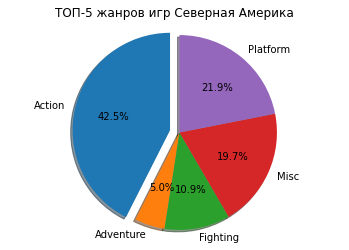

In [61]:

fig, ax = plt.subplots()
ax.pie(genre_sales['na_sales'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
ax.set_title("ТОП-5 жанров игр Северная Америка")

plt.show()

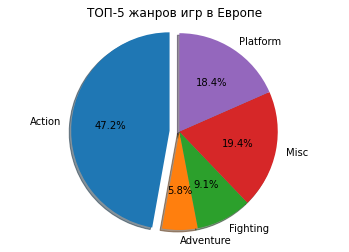

In [62]:
fig, ax = plt.subplots()
ax.pie(genre_sales['eu_sales'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
ax.set_title("ТОП-5 жанров игр в Европе")

plt.show()

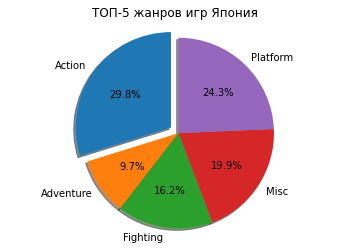

In [63]:
fig, ax = plt.subplots()
ax.pie(genre_sales['jp_sales'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
ax.set_title("ТОП-5 жанров игр Япония")

plt.show()

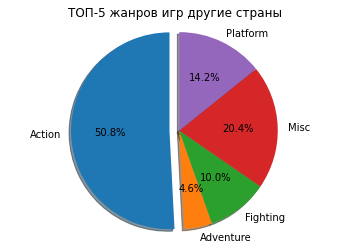

In [64]:
fig, ax = plt.subplots()
ax.pie(genre_sales['other_sales'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
ax.set_title("ТОП-5 жанров игр другие страны")

plt.show()

###### Предподчтения по жанрам среди регионов одинаковые: спорт,  приключения, бродилки, акшен, ролевые. Отличеается доля жанров. Абсолютное большинство предпочитает экшен. Остальные страны выделяются  жанром ролевой и стрелялкой.

### 4.3 Влияние рейтинга на продажи
<a id="raiting"></a>

Рейтингов всего 8, найдем топ-8 по продажам, затем по названию игры сопоставим рейтинг

оставим игры с рейтингом no_info</b>


In [65]:
region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
rating_top = (data.groupby('rating')[region]
    .sum()
    .sort_values(by = region, ascending=False)
    .reset_index()) #.plot(kind='pie')

#rating_top = rating_top[rating_top['rating']  != "no_info"].reset_index(drop=True)
rating_top

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,1274.24,703.87,197.96,231.54
1,no_info,1225.84,609.65,836.74,149.87
2,T,747.60,421.79,150.70,152.99
3,M,742.89,480.00,63.58,176.06
4,E10+,345.50,183.35,40.20,71.93
5,K-A,2.56,0.27,1.46,0.03
6,EC,1.53,0.11,0.00,0.11
7,AO,1.26,0.61,0.00,0.09
8,RP,0.00,0.03,0.00,0.01


Сопоставим численные значения рейтингам. 0 - самый лучшмй рейтинг, 7 самый пллохой. Добавим рейтинг в rating_top для расчета корреляции 

In [66]:
rating = []
##for j in len(rating_top['rating']):
for j in range(len(rating_top['rating'])):
    rating.append(j)
rating

rating_top['rating_game'] = rating
rating_top

,rating,na_sales,eu_sales,jp_sales,other_sales,rating_game
0,E,1274.24,703.87,197.96,231.54,0
1,no_info,1225.84,609.65,836.74,149.87,1
2,T,747.60,421.79,150.70,152.99,2
3,M,742.89,480.00,63.58,176.06,3
4,E10+,345.50,183.35,40.20,71.93,4
5,K-A,2.56,0.27,1.46,0.03,5
6,EC,1.53,0.11,0.00,0.11,6
7,AO,1.26,0.61,0.00,0.09,7
8,RP,0.00,0.03,0.00,0.01,8


E-0, T-1, M-2....RP-7 увеличение значения соотвествует снижению рейтинга

In [67]:
rating_top.corr()

,na_sales,eu_sales,jp_sales,other_sales,rating_game
na_sales,1.000000,0.993103,0.722231,0.949380,-0.944418
eu_sales,0.993103,1.000000,0.651475,0.977505,-0.941452
jp_sales,0.722231,0.651475,1.000000,0.484502,-0.619981
other_sales,0.949380,0.977505,0.484502,1.000000,-0.922246
rating_game,-0.944418,-0.941452,-0.619981,-0.922246,1.000000


Поскольку 0 это наивысший рейтинг, увеличиение рейтинга соотвествует уменьшение продаж игр. Значения коэффицинета корреляции боле 0,9 свидетельствует о сильной зависимости между рейтингом и продажей игр по различным регионам.

# 5 Формулирование и проверка гипотез
<a id="hypothesis"></a>

критический уровень статистической значимости примем 0.05¶

In [68]:
alpha = .05 

##  5.1 Изучение рейтингов платформ Xbox One и PC 
<a id="xbox"></a>

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны, альтернативная гипотеза, что рейтинги отличаются. Если распределение нормальное, то проверять гипотезу будем Т критерием и только в том случе, если дисперсии будут близки

Точное имя исследуемых платформ

In [69]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

уберем хвосты

In [70]:
platform = (data
            .query('(5 < user_score < 10.) and (platform == "XOne" or platform  == "PC")')
            .reset_index(drop=True)
           )
platform[:3]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_sales,na_sales_part,eu_sales_part,jp_sales_part,other_sales_part
0,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01,0.000228,0.002675,0.000000,0.000767
1,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,73.0,7.4,no_info,7.39,0.001057,0.000879,0.000008,0.000869
2,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29,0.000018,0.002588,0.000000,0.000000


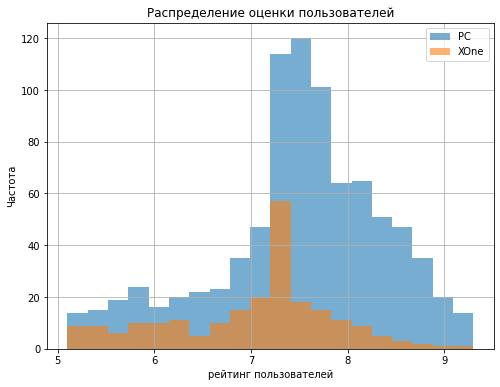

In [71]:
ax = (platform
         .pivot_table(index='name', columns='platform')
         .plot.hist(y='user_score', figsize=(8, 6), grid=True, bins=20, alpha=0.6)
) 


ax.set_title('Распределение оценки пользователей');
ax.legend(["PC", "XOne"]);
ax.set_xlabel('рейтинг пользователей');
ax.set_ylabel('Частота');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Распределения близки к нормальному, слегка асимметрично. Посмотрим дисперсию

In [72]:
np.var(platform.query(' platform == "XOne"')['user_score'], ddof=1)

0.7512401075981444

In [73]:
platform.query(' platform == "XOne"')['user_score'].mean()

7.030396475770925

In [74]:
np.var(platform.query(' platform == "PC"')['user_score'], ddof=1)

0.7776987088817323

In [75]:
platform.query(' platform == "PC"')['user_score'].mean()

7.507035755478661

Дисперсии и средние близки, можно делать предположения о равенстве средних рейтингов пользователей. Формируем выборки

In [76]:
PC = platform.query('"PC"  in platform')['user_score'].reset_index(drop=True)
XOne = platform.query('"XOne"  in platform')['user_score'].reset_index(drop=True)


In [77]:
results = st.ttest_ind(
    PC, 
    XOne)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.60162248553208e-13
Отвергаем нулевую гипотезу


Отвергаем гипотезу Н0 по критерию Стюдента. 

Интересно получается, что близкие значения получены случайно.  Выборки разные и для сравнения необходимо сегментировать данные

##  5.2 Изучение рейтингов  жанров Action и Sports  
<a id="action"></a>

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны, альтернативная гипотеза, что рейтинги отличаются. Если распределение нормальное, то проверять гипотезу будем Т критерием и только в том случе, если дисперсии будут близки

In [78]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [79]:
genre = data[data['genre'].isin(['Sports', 'Action'])][['name','genre','user_score']].reset_index(drop=True)    
genre[:3]
#len(genre[genre['user_score'] < 4])

,name,genre,user_score
0,Wii Sports,Sports,8.0
1,Wii Sports Resort,Sports,8.0
2,Wii Fit,Sports,7.7


In [80]:
len(genre)

5613

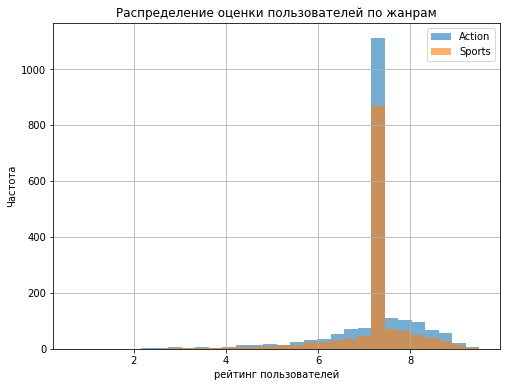

In [81]:
ax = (genre
         .pivot_table(index='name', columns='genre')
         .plot.hist(y='user_score', figsize=(8, 6), grid=True, bins=30, alpha=0.6)
) 


ax.set_title('Распределение оценки пользователей по жанрам');
ax.legend(["Action", "Sports"]);
ax.set_xlabel('рейтинг пользователей');
ax.set_ylabel('Частота');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Вытянутое нормальное распределение

In [82]:
np.var(genre.query(' genre == "Action"')['user_score'], ddof=1)

1.1298428931572124

In [83]:
genre.query(' genre == "Action"')['user_score'].mean()

7.214333232537044

In [84]:
np.var(genre.query(' genre == "Sports"')['user_score'], ddof=1)

1.2791524609008285

In [85]:
genre.query(' genre == "Sports"')['user_score'].mean()

7.189722463139636

Дисперсии отличаются несильно

In [86]:
Sports = genre.query('"Sports"  in genre')['user_score'].reset_index(drop=True)
Action = genre.query('"Action"  in genre')['user_score'].reset_index(drop=True)

In [87]:
results = st.ttest_ind(
    Action, 
    Sports)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4059173001251194
Не получилось отвергнуть нулевую гипотезу


Продажи жанров спорт и экшн лидеры продаж. Возможно поэтому равенство среднего пользовательского рейтинга этих жанров случается в 40% выборок

## Общий вывод
<a id="resume"></a>


Исследовали продажи игровых платформ. В среднем платформа развивается 1-2 года, держится на пике популярности от 4 до 6 лет, затем плавно продажи спадают. Выяснено, что пользовательская оценка и оценка критиков почти никак не влияет на продажи платформ. В то время как рейтинг очень сильно сказывается на количестве продаж. На 2017 год еть две платформы в фаворитах - PS4, XOne. Но продажи этих платформ идут на спад. Вполне возможно появление после 2017 новой платформы. Поддтвердилось предположение о том, что средний рейтинг двух самых популярных жанров экшн и спорт совпадает, эти жанры лидеры на всех платформах . А среди платформ не получилось подтвердить предположение о том, что средний рейтинг платформ PC и XOne одинаков. Разные критерии. Лучше продавать игры жанров акшн и спорт, как частопродавемые, рейтинговые и соотвественно приносящие прибыль магазину.

